<a href="https://colab.research.google.com/github/piotrkm/dengue_data_repo/blob/main/DENGUE_project_grupa_01_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/piotrkm/dengue_data_repo/main/dengue_clean.csv', index_col='serial')
dataset.drop('Unnamed: 0', axis=1, inplace=True)

# Import biblioteki TensorFlow

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [41]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['cases'], axis=1)
y = dataset['cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [315]:
model = keras.Sequential([
    layers.Dense(128, activation='leaky_relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.005), metrics=['R2Score'])

model.fit(X_train, y_train, epochs=120, verbose=0)

In [316]:
loss = model.history.history['loss']
metrics = model.history.history['R2Score']

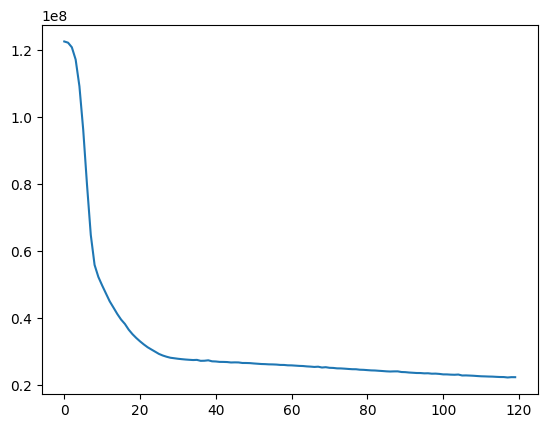

In [317]:
plt.plot(loss)
plt.show()

In [318]:
#plt.plot(metrics)
#plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


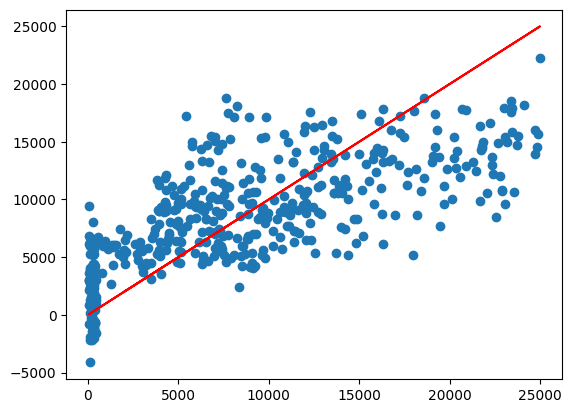

In [319]:
plt.scatter(y_train, model.predict(X_train))
plt.plot(y_train, y_train, c='red')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


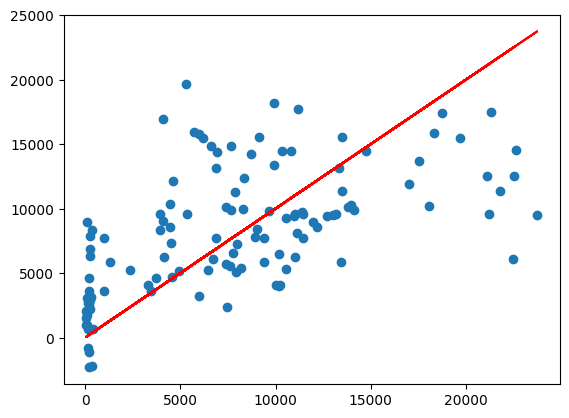

In [320]:
plt.scatter(y_test, model.predict(X_test))
plt.plot(y_test, y_test, c='red')
plt.show()

In [321]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


0.2737067348404921

In [322]:
r2_score(y_train, model.predict(X_train))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.5421797826081298